# Code for reproducing figures
Jupyter notebook accompanying "Predictive coding is a consequence of energy efficiency in recurrent neural networks".
This notebook produces the figures in the main paper & appendices.

### Imports

In [1]:
import sys
sys.executable

'/home/platelminto/Documents/uu/research/EmergentPredictiveCoding/venv/bin/python'

In [2]:
import torch
import torchvision
import torch.nn.functional as F
import numpy as np
import pandas as pd
from typing import Tuple, List, Callable, Optional
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import functions
import mnist
import Network
import plot
import helper
import cifar

### Load datasets

In [3]:
if torch.cuda.is_available():
    DEVICE = 'cuda'
    torch.set_default_tensor_type(torch.cuda.FloatTensor)
else:
    DEVICE = 'cpu'

print('Using {}'.format(DEVICE))

INPUT_SIZE_MNIST = 28*28
INPUT_SIZE_CIFAR = 32*32*3
BATCH_SIZE = 32
SEQ_LENGTH = 10
LOSS_FN = functions.L1Loss
# load MNIST
training_set_m, validation_set_m, test_set_m = mnist.load(val_ratio=0.0)
# load CIFAR10
training_set_c, validation_set_c, test_set_c = cifar.load(val_ratio=0.0, color=True)

Using cpu
Files already downloaded and verified
Files already downloaded and verified


### Load trained networks for MNIST & CIFAR10 

In [17]:
mnist_nets = []
cifar_nets = []
n_instances = 1
# load networks for bootstrap
for i in range(0, n_instances):
    mnist_net = Network.State(activation_func=torch.nn.ReLU(),
            optimizer=torch.optim.Adam,
            lr=1e-4,
            input_size=INPUT_SIZE_MNIST,
            hidden_size=INPUT_SIZE_MNIST,
            title="patterns_rev/seeded_mnist/mnist_net_l1_pre",
            device=DEVICE, seed=None)
    mnist_net.load(i)
    mnist_nets.append(mnist_net)
    
    # cifar_net = Network.State(activation_func=torch.nn.ReLU(),
    #         optimizer=torch.optim.Adam,
    #         lr=1e-4,
    #         input_size=INPUT_SIZE_CIFAR,
    #         hidden_size=INPUT_SIZE_CIFAR,
    #         title="networks/cifar_networks/cifar_net",
    #         device=DEVICE)
    # cifar_net.load(i)
    # cifar_nets.append(cifar_net)
    
# load networks for single network analyses
# digit_net = Network.State(activation_func=torch.nn.ReLU(),
#             optimizer=torch.optim.Adam,
#             lr=1e-4,
#             input_size=INPUT_SIZE_MNIST,
#             hidden_size=INPUT_SIZE_MNIST,
#             title="networks/mnist_networks/digit_net",
#             device=DEVICE)
# cifar10_net = Network.State(activation_func=torch.nn.ReLU(),
#             optimizer=torch.optim.Adam,
#             lr=1e-4,
#             input_size=INPUT_SIZE_CIFAR,
#             hidden_size=INPUT_SIZE_CIFAR,
#             title="networks/cifar_networks/cifar10_net",
#             device=DEVICE)
# digit_net.load()
# cifar10_net.load()

### Figure 2A: evolution of preactivation over time & three theoretical benchmarks
Note: seed=None is necessary if you want to have the correct results.

In [19]:
helper.bootstrap_model_activity(mnist_nets, training_set_m, test_set_m, seed=None, lesioned=False)

{'norm': [array([[0.19857495, 0.18569432, 0.16875754, 0.16363792, 0.16208713,
          0.15704809, 0.15808913, 0.15978754, 0.16160637, 0.16039972]])],
 'lesion': [array([[0.19857495, 0.18665136, 0.1868543 , 0.18726009, 0.18968274,
          0.18521148, 0.18662764, 0.18907861, 0.19090657, 0.19062772]])],
 'cont': [array([[0.20020486, 0.18586938, 0.17196296, 0.16435874, 0.16195631,
          0.16127375, 0.15758948, 0.16044505, 0.157298  , 0.15677284]])],
 'bs_norm': [[0.1985749453306198    (0.1985749453306198, 0.1985749453306198),
   0.18569432199001312    (0.18569432199001312, 0.18569432199001312),
   0.16875754296779633    (0.16875754296779633, 0.16875754296779633),
   0.1636379212141037    (0.1636379212141037, 0.1636379212141037),
   0.16208712756633759    (0.16208712756633759, 0.16208712756633759),
   0.1570480912923813    (0.1570480912923813, 0.1570480912923813),
   0.15808913111686707    (0.15808913111686707, 0.15808913111686707),
   0.15978753566741943    (0.15978753566741943, 0.

### Figure 2B: display input & inhibitory drive for example mnist sequence

In [20]:
plot.example_sequence_state(mnist_nets[0], test_set_m, seed=2553, save=False)

([tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000

### Figure 3A: scatter plot of prediction & error units for digit 9 class

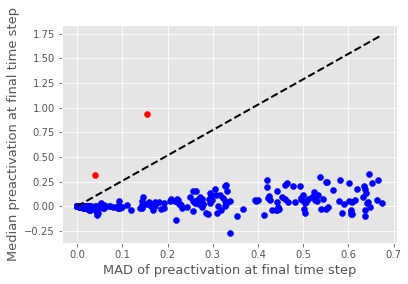

In [6]:
# change cls_plt [0-9] to look at the plots for other classes
plot.scatter_units(digit_net, test_set_m, cls_plt=9, seed=2553, save=False)

### Figure 3B: plot topographic distribution of prediction & error units for MNIST

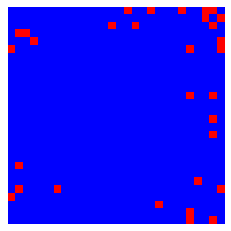

In [7]:
plot.topographic_distribution(digit_net, test_set_m, seed=2553, save=False)

### Figure 4B:  evolution of preactivation for model, lesioned model, control & three benchmarks¶

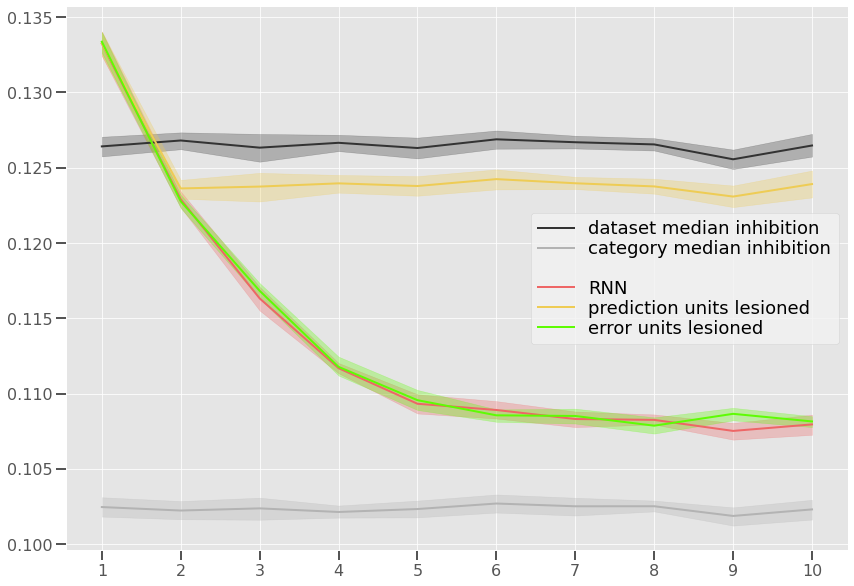

In [8]:
plot.bootstrap_model_activity(mnist_nets, training_set_m, test_set_m, seed=None, lesioned=True, save=False, data_type='mnist')

### Figure 5B: scatter plot of prediction & error units for truck class

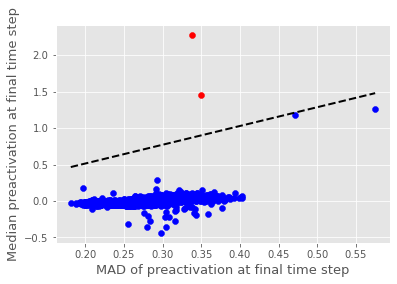

In [9]:
# change cls_plt [0-9] to look at the plots for other classes
plot.scatter_units(cifar10_net, test_set_c, cls_plt=9, seed=2553, save=False)

### Figure 5C: evolution of preactivation for model, lesioned model, control & three benchmarks for CIFAR10

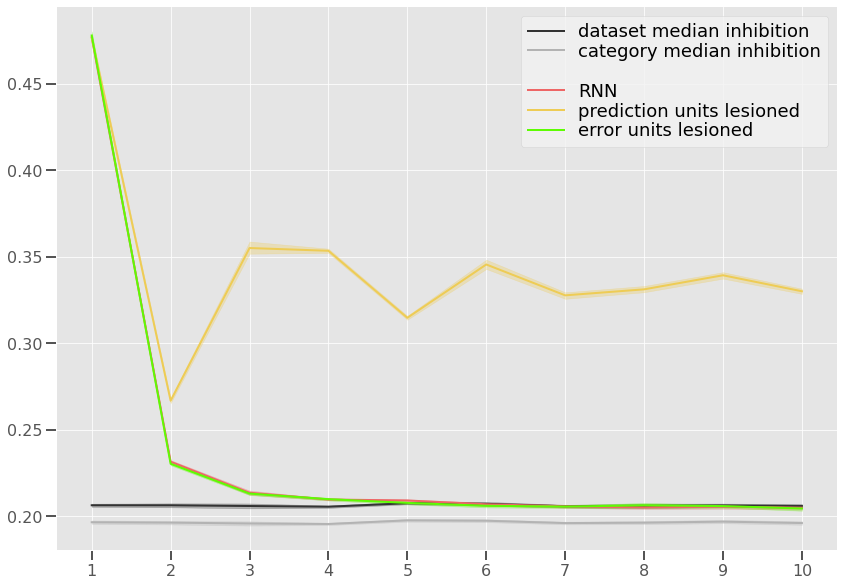

In [10]:
plot.bootstrap_model_activity(cifar_nets, training_set_c, test_set_c, seed=None, lesioned=True, save=False, data_type='cifar')

### Figure 4A & Appendix A1, A2

Produces figures in Appendix A of paper:  Each square shows the internal drive of the network at a certain point in a sequence, e.g. for the first row at prec. fr.=2 we have the internal drive after the sequence 8-9 and at prec. fr.=5 we have the internal drive after the sequence 5-6-7-8-9.

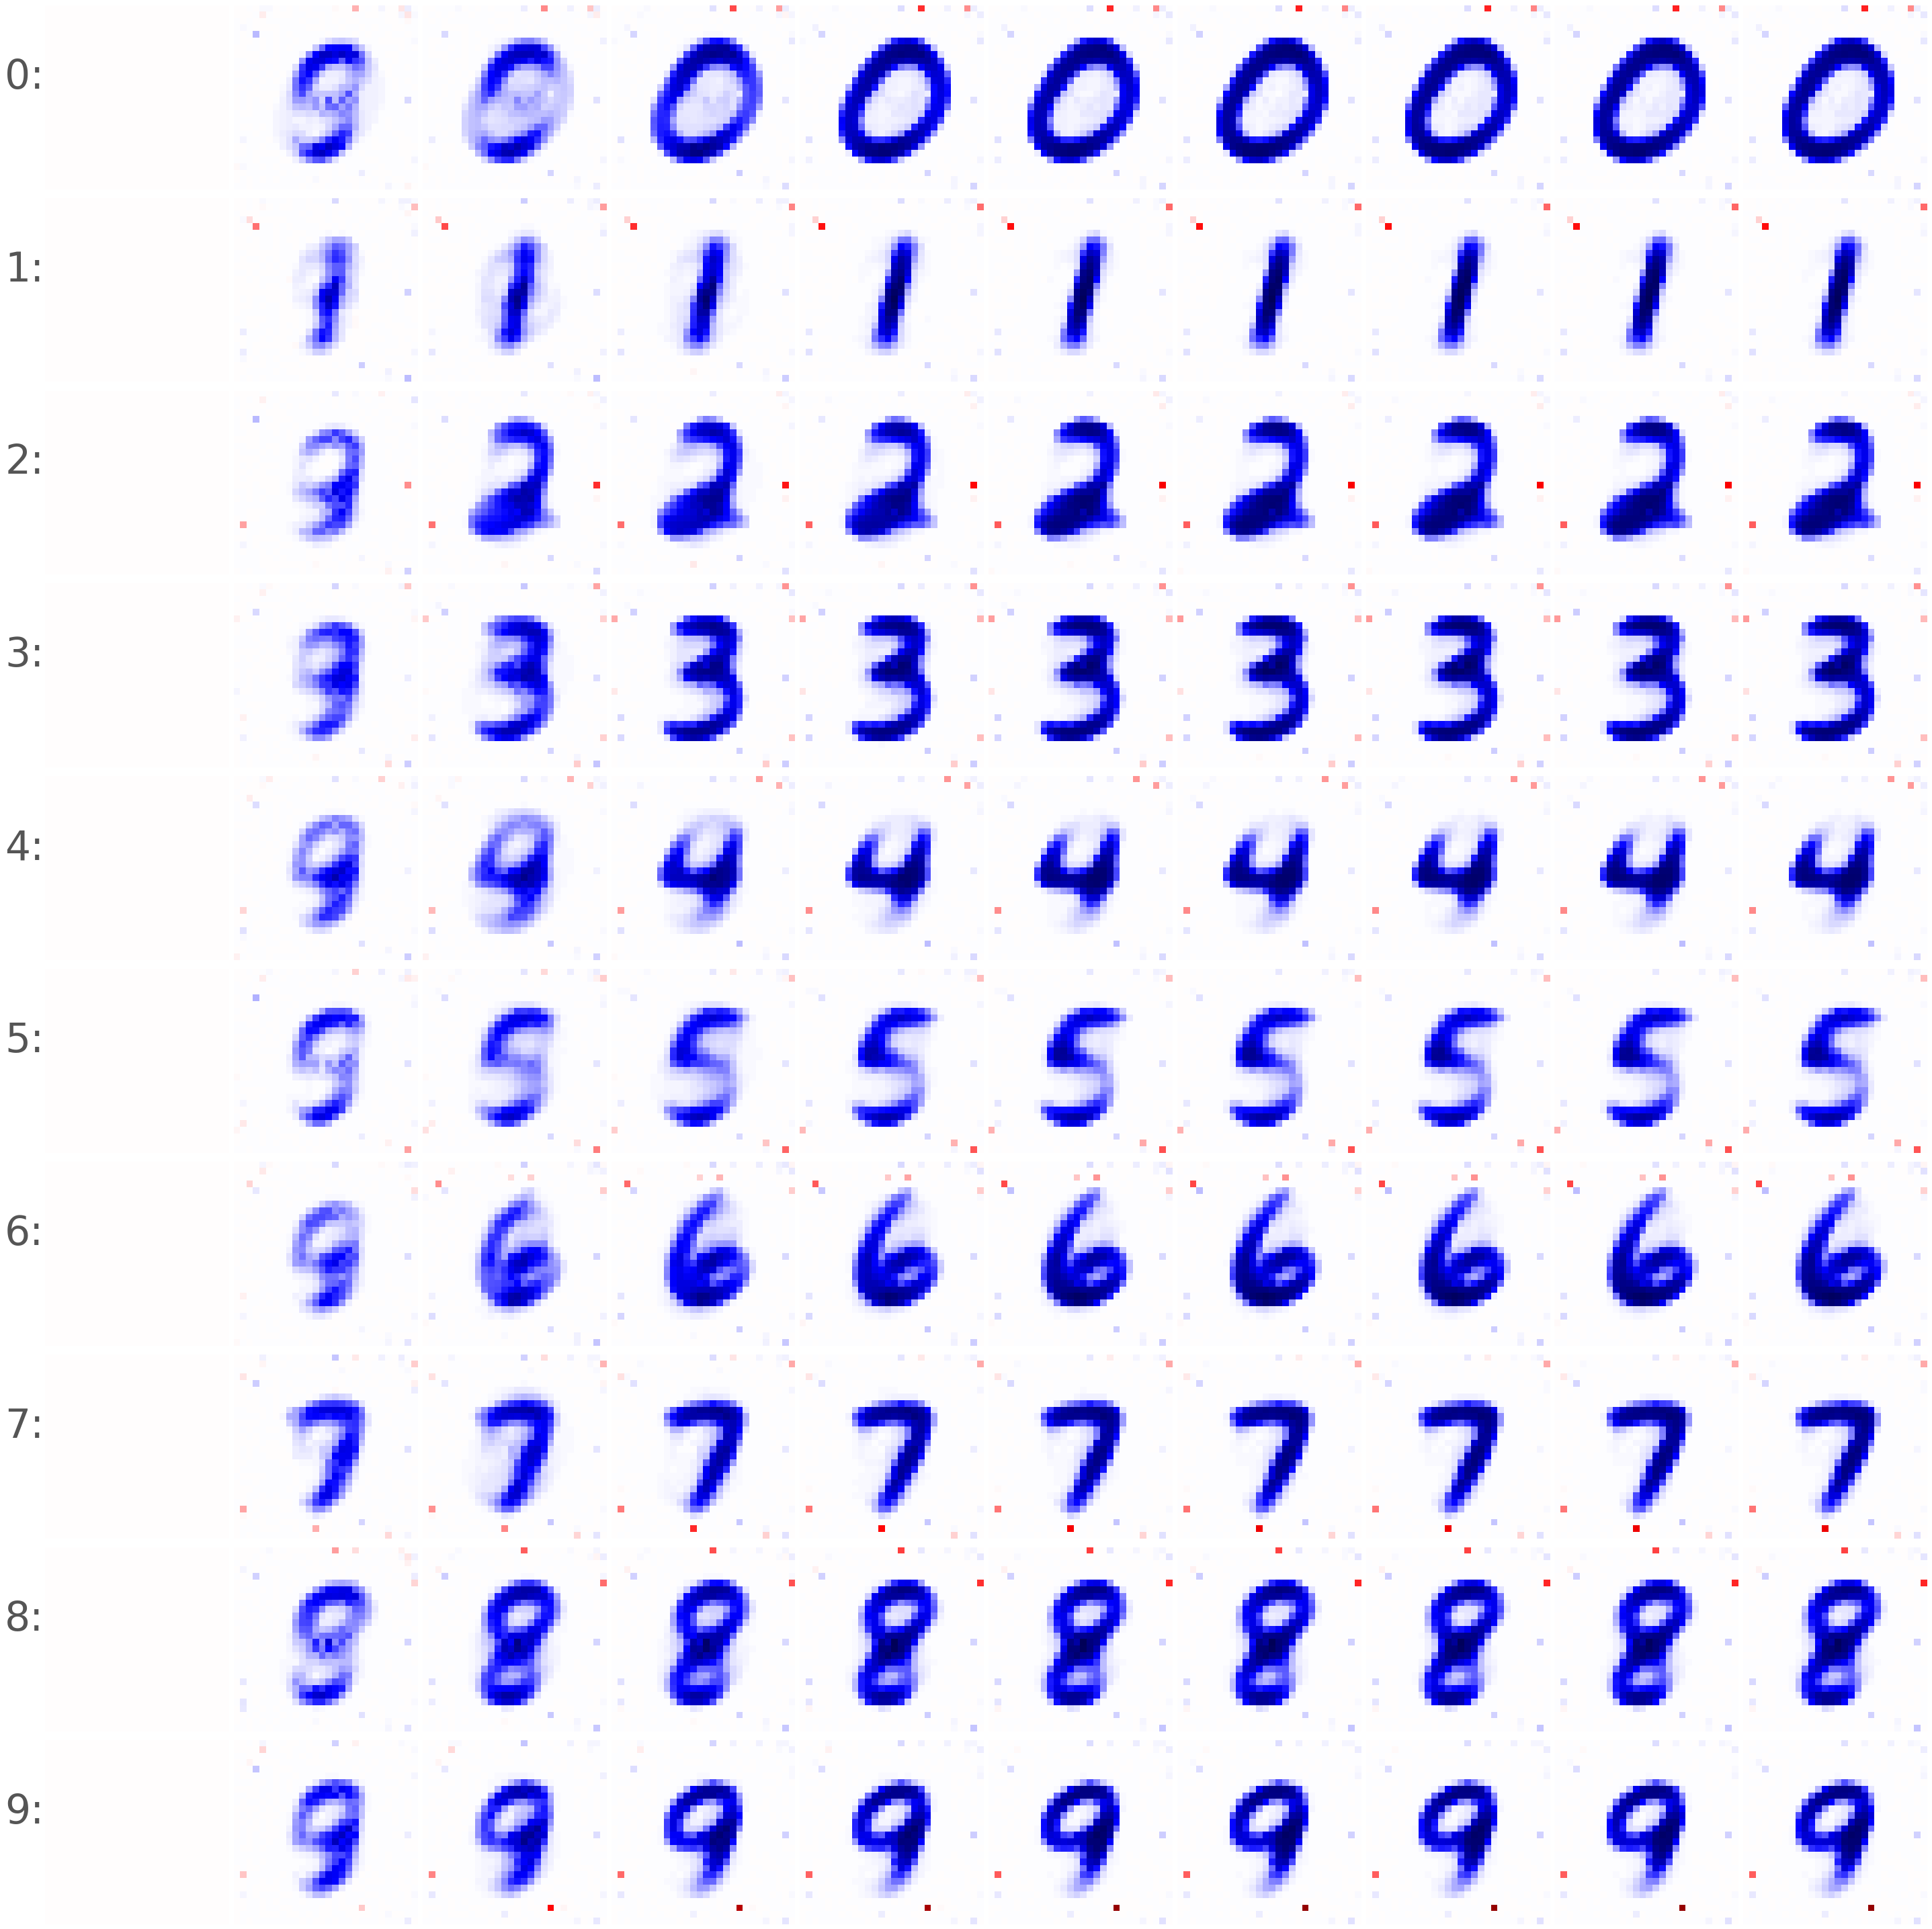

In [11]:
plot.pred_after_timestep(digit_net, test_set_m, mask=None, save=False)

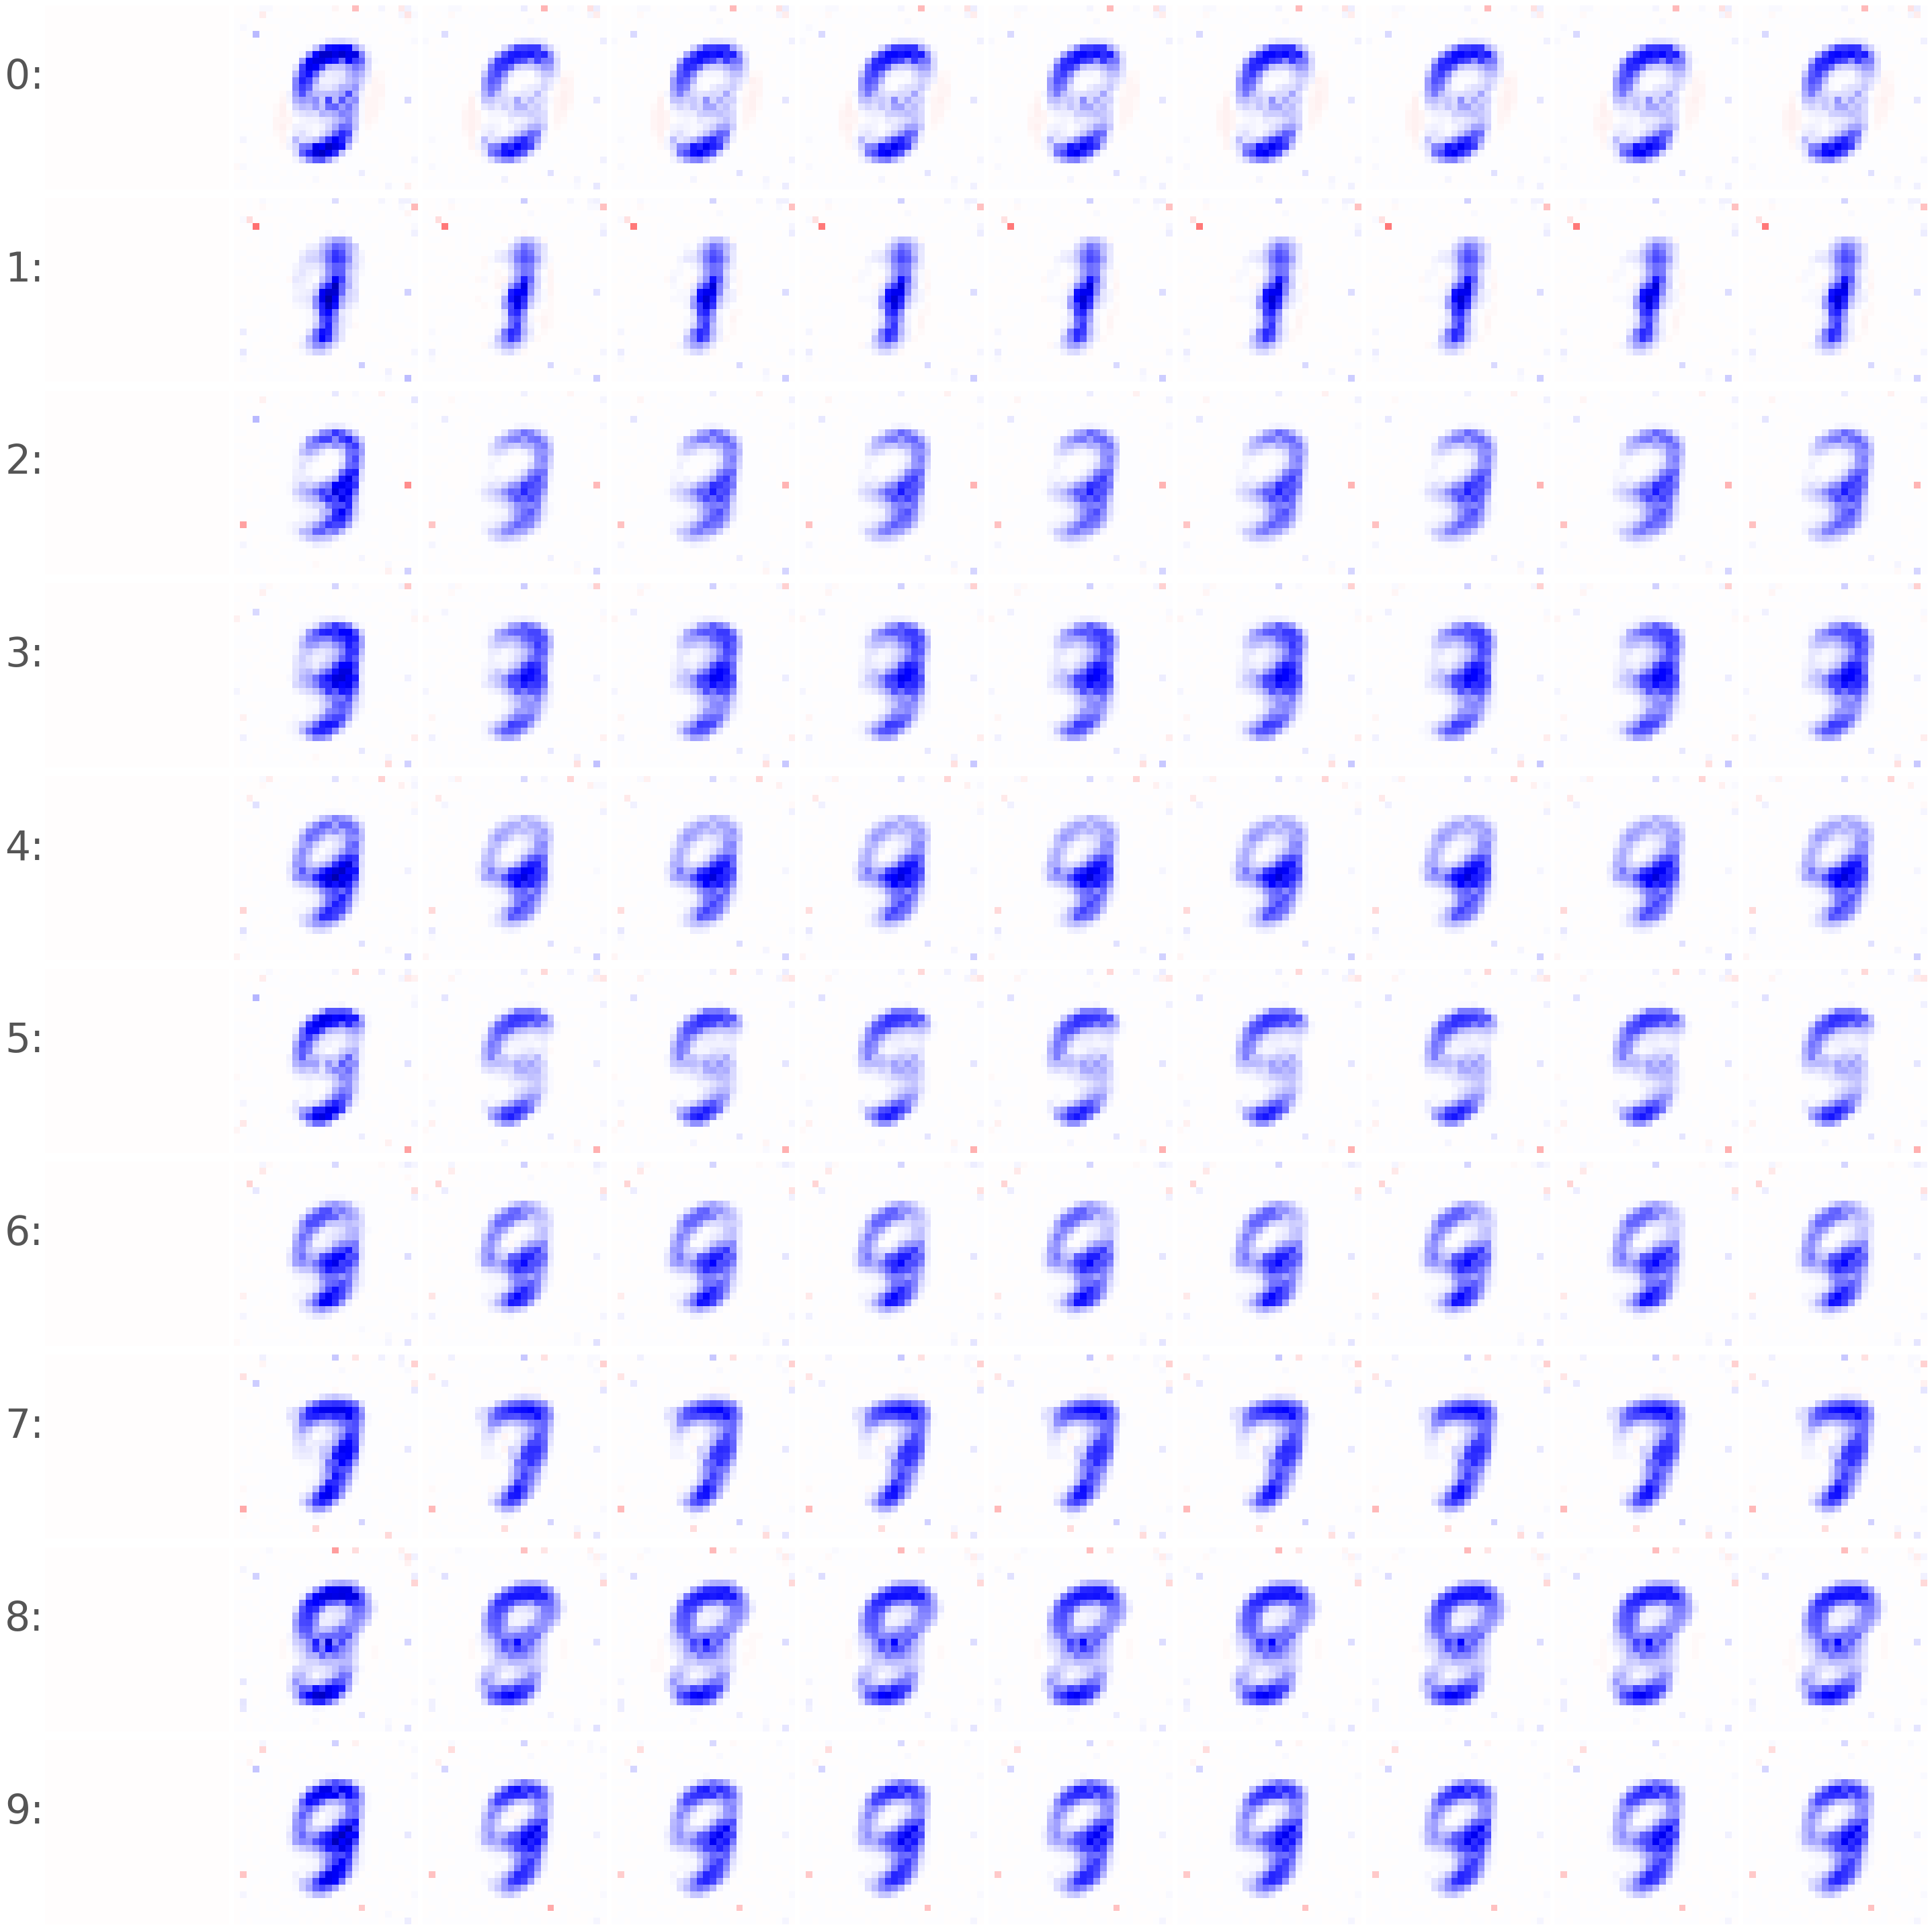

In [12]:
plot.pred_after_timestep(digit_net, test_set_m, mask=helper._pred_mask(digit_net, test_set_m, training_set_m), save=False)

### Appendix A3, A4: scatter plots prediction & error units for MNIST & CIFAR10
The lines of code have been commented out, since they produce the images one at a time. You can uncomment this if you want to see the scatter plots for all classes. 

In [13]:
#for cls_plt in range(10):
    #plot.scatter_preact(digit_net, test_set_m, training_set_m, cls_plt=cls_plt,save=False)
    #plot.scatter_preact(cifar_net, test_set_c, training_set_cc, cls_plt=cls_plt, save=False)